In [4]:
# !pip install face_recognition

from face_recognition import face_locations
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

import pandas as pd

## 1. Trying out face_recognition package

In [5]:
run_test = False

if run_test == True:
    # Download the image from the web
    urls = [
        'https://static.posters.cz/image/750/plakater/spring-forrest-i101995.jpg',
        'https://images.pexels.com/photos/1035671/pexels-photo-1035671.jpeg?cs=srgb&dl=pexels-anastasiya-lobanovskaya-1035671.jpg&fm=jpg'
        ]

    for i, url in enumerate(urls):
        print(f"Prediction {i}")
        response = requests.get(url)

        # Open the image using Pillow
        img = Image.open(BytesIO(response.content))

        # Convert the image to a numpy array
        img_array = np.asarray(img)

        # Find all the faces in the image
        print("prediction:", face_locations(img_array))

        # Show the image
        plt.imshow(img_array)
        plt.show()

        print()



## 2. Data exploring

In [21]:
# Read in all files from the dataset as dataframes.
list_eval_partition = pd.read_csv('../data/celeb_dataset/list_eval_partition.csv')
list_bbox_celeba = pd.read_csv('../data/celeb_dataset/list_bbox_celeba.csv')
list_landmarks_celeba = pd.read_csv('../data/celeb_dataset/list_landmarks_align_celeba.csv')
list_attr_celeba = pd.read_csv('../data/celeb_dataset/list_attr_celeba.csv')


display(list_eval_partition.head())
print("list_eval_partition.csv: \nRecommended partitioning of images into training, validation, testing sets. \
      \nImages 1-162770 are training, 162771-182637 are validation, 182638-202599 are testing.\n\n")

display(list_bbox_celeba.head())
print('list_bbox_celeba.csv: \
      \nBounding box information for each image. "x_1" and "y_1" represent the upper left \
      \npoint coordinate of bounding box. "width" and "height" represent the width and height of bounding box\n\n')

display(list_landmarks_celeba.head())
print("list_landmarks_align_celeba.csv: \
      \nImage landmarks and their respective coordinates. There are 5 landmarks: \
      \nleft eye, right eye, nose, left mouth, right mouth\n\n")

display(list_attr_celeba.head())
print('list_attr_celeba.csv: \
      \nAttribute labels for each image. There are 40 attributes. "1" represents positive while "-1" represents negative\n\n')


,image_id,partition
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0


list_eval_partition.csv: 
Recommended partitioning of images into training, validation, testing sets.       
Images 1-162770 are training, 162771-182637 are validation, 182638-202599 are testing.




,image_id,x_1,y_1,width,height
0,000001.jpg,95,71,226,313
1,000002.jpg,72,94,221,306
2,000003.jpg,216,59,91,126
3,000004.jpg,622,257,564,781
4,000005.jpg,236,109,120,166


list_bbox_celeba.csv:       
Bounding box information for each image. "x_1" and "y_1" represent the upper left       
point coordinate of bounding box. "width" and "height" represent the width and height of bounding box




,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,000001.jpg,69,109,106,113,77,142,73,152,108,154
1,000002.jpg,69,110,107,112,81,135,70,151,108,153
2,000003.jpg,76,112,104,106,108,128,74,156,98,158
3,000004.jpg,72,113,108,108,101,138,71,155,101,151
4,000005.jpg,66,114,112,112,86,119,71,147,104,150


list_landmarks_align_celeba.csv:       
Image landmarks and their respective coordinates. There are 5 landmarks:       
left eye, right eye, nose, left mouth, right mouth




,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


list_attr_celeba.csv:       
Attribute labels for each image. There are 40 attributes. "1" represents positive while "-1" represents negative




In [22]:
# We are gonna focus on the attributes for now.

display(list_attr_celeba.head().T)

,0,1,2,3,4
image_id,000001.jpg,000002.jpg,000003.jpg,000004.jpg,000005.jpg
5_o_Clock_Shadow,-1,-1,-1,-1,-1
Arched_Eyebrows,1,-1,-1,-1,1
Attractive,1,-1,-1,1,1
Bags_Under_Eyes,-1,1,-1,-1,-1
Bald,-1,-1,-1,-1,-1
Bangs,-1,-1,-1,-1,-1
Big_Lips,-1,-1,1,-1,1
Big_Nose,-1,1,-1,-1,-1
Black_Hair,-1,-1,-1,-1,-1


In [25]:
# !pip install sweetviz
import sweetviz as sv

analysis = sv.analyze(list_attr_celeba)

/Users/thomas/.pyenv/versions/3.11.1/envs/fairness/lib/python3.11/site-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/Users/thomas/.pyenv/versions/3.11.1/envs/fairness/lib/python3.11/site-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()
Feature: image_id                            |▏         | [  2%]   00:00 -> (00:05 left)/Users/thomas/.pyenv/versions/3.11.1/envs/fairness/lib/python3.11/site-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
Feature: 5

In [35]:
analysis.show_html(filepath='SWEETVIZ_REPORT.html', open_browser=True, layout='vertical', scale=None)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



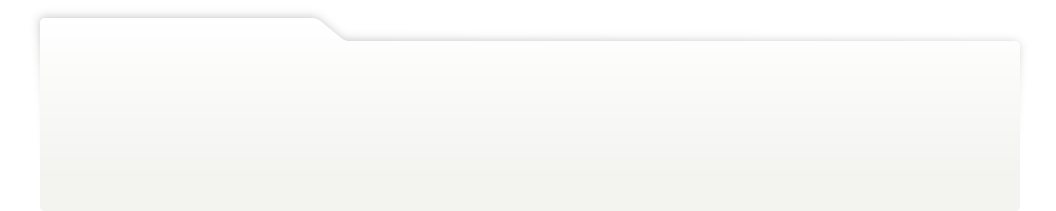
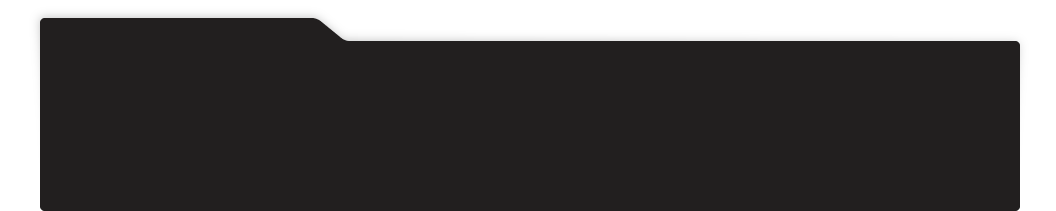
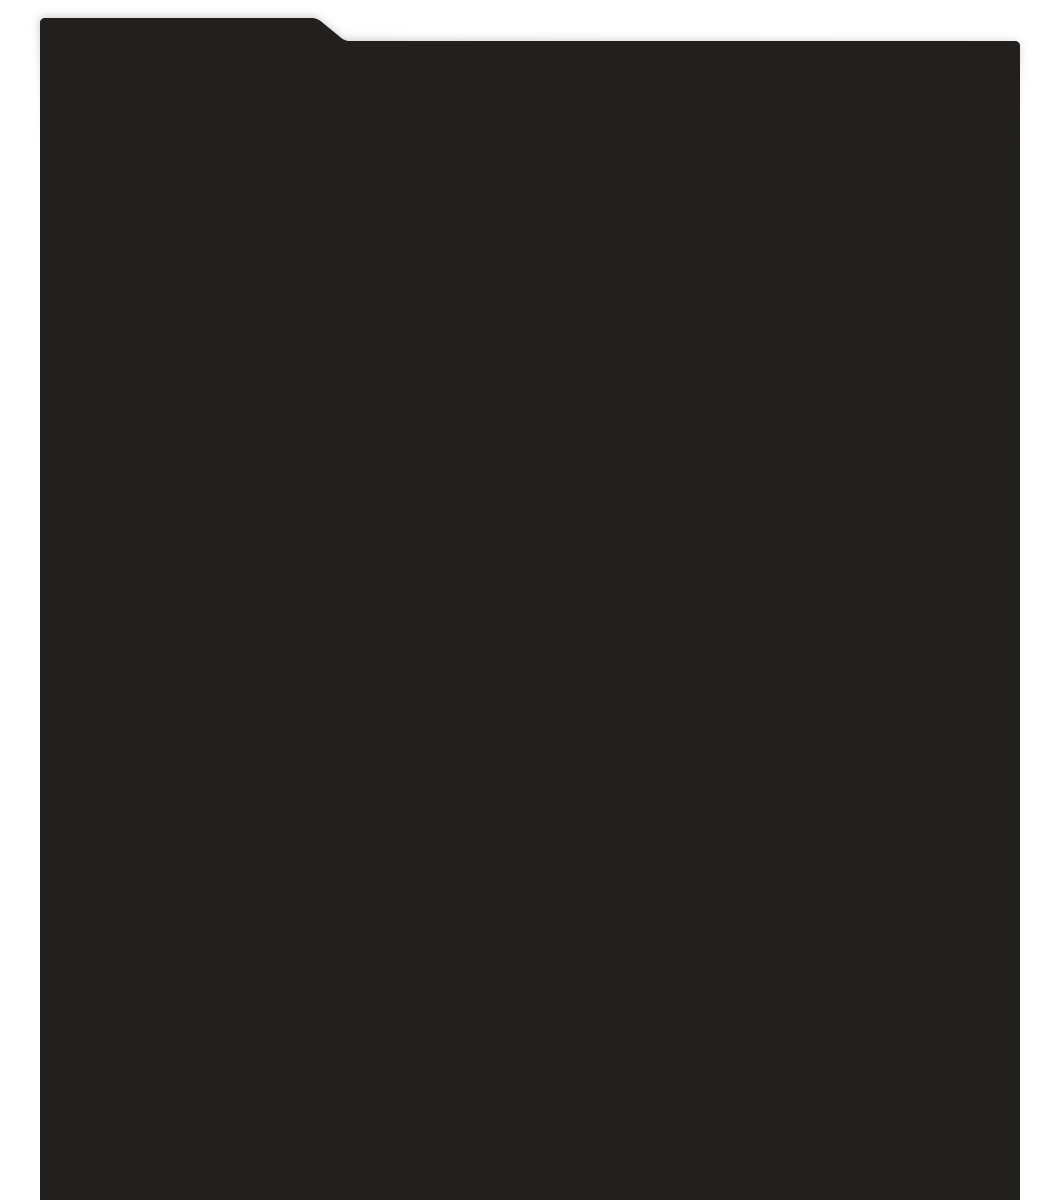
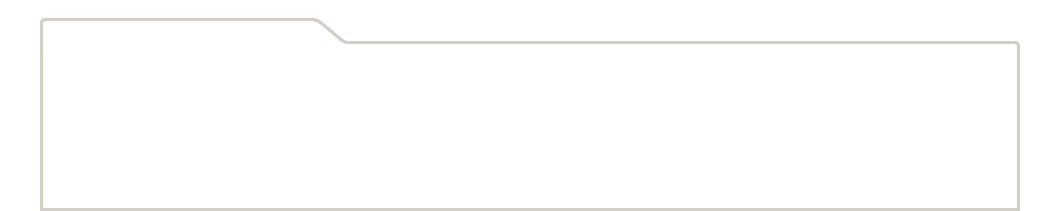
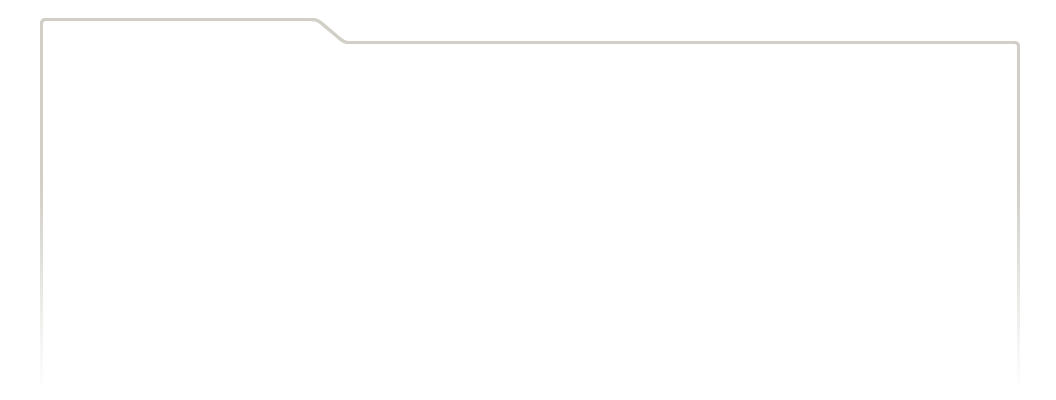
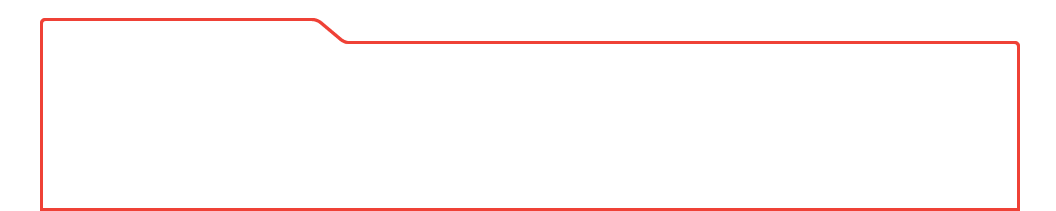
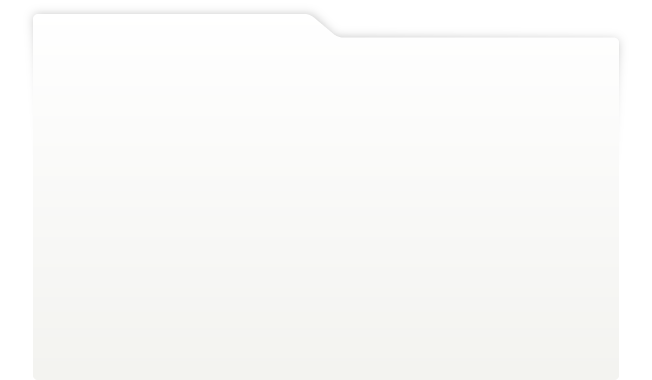
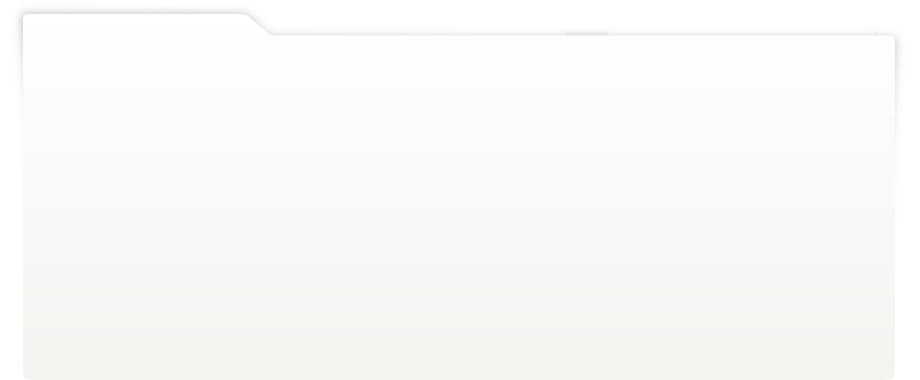
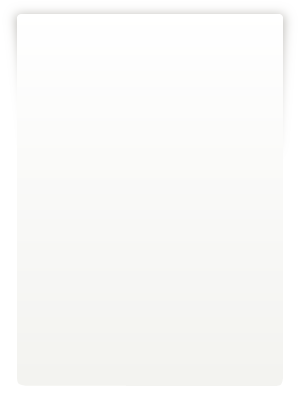
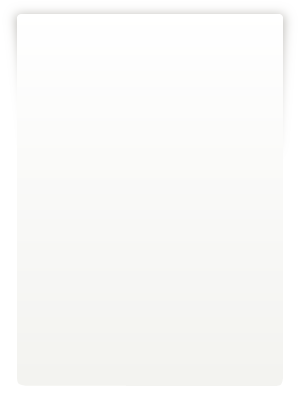
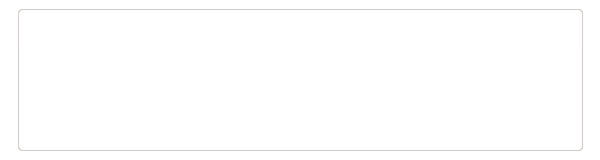
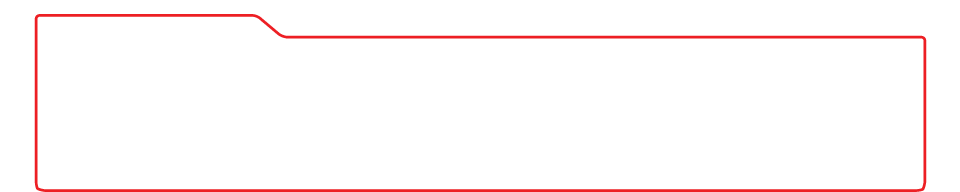
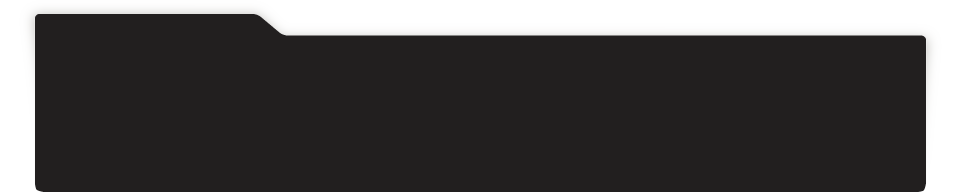
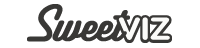
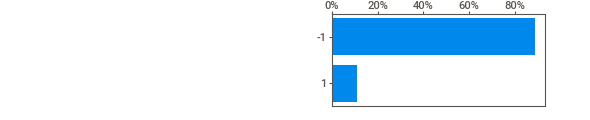
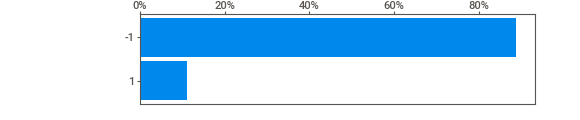
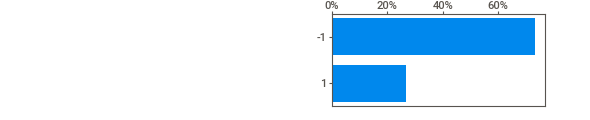
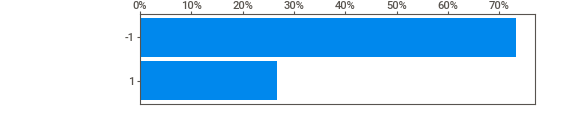
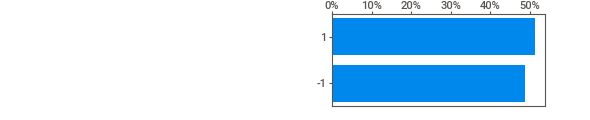
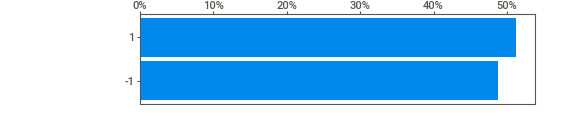
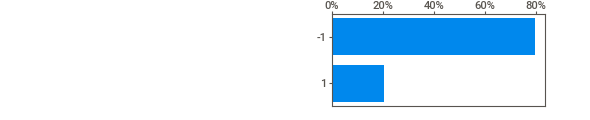
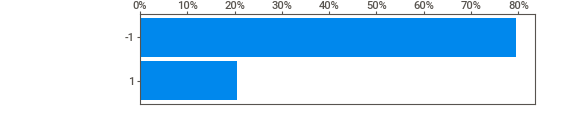
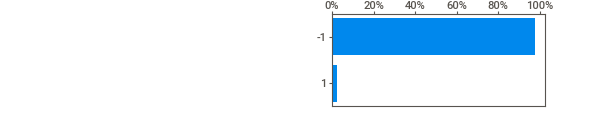
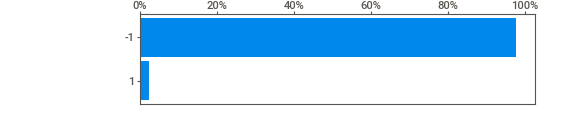
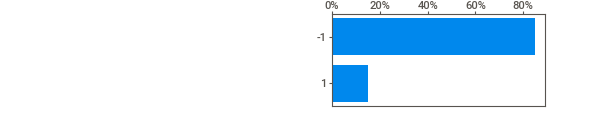
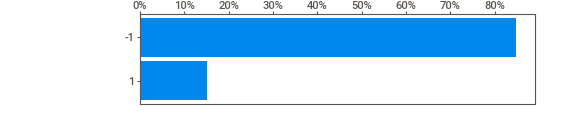
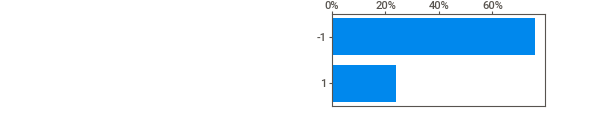
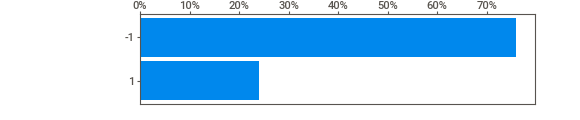
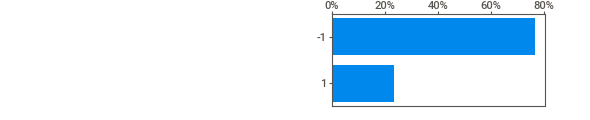
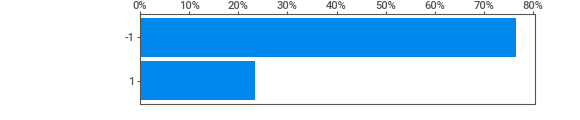
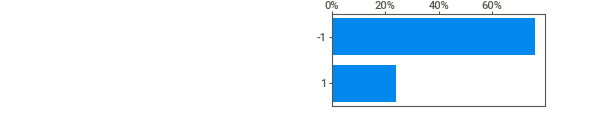
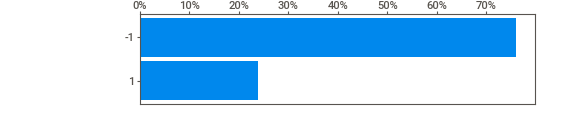
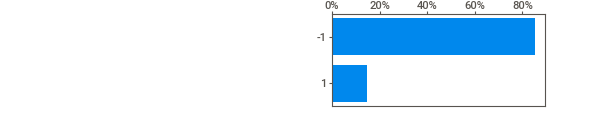
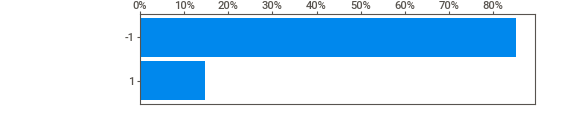
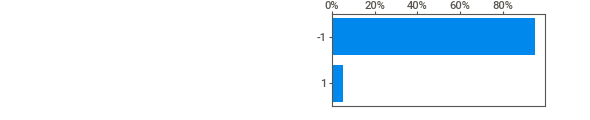
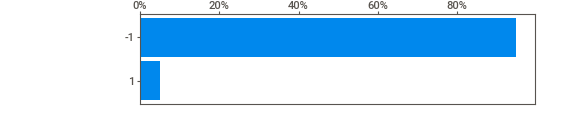
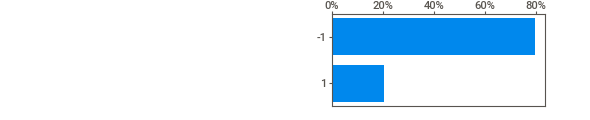
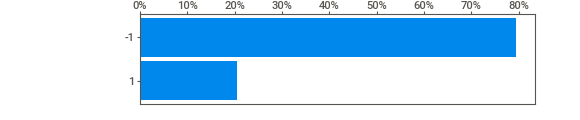
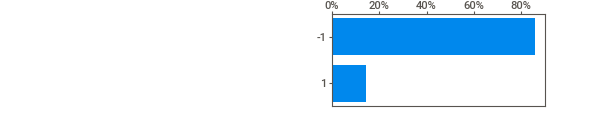
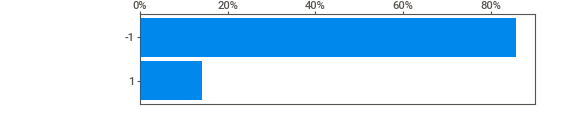
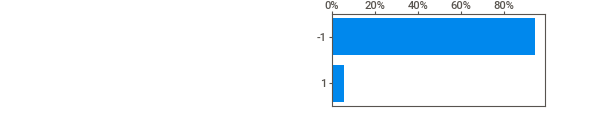
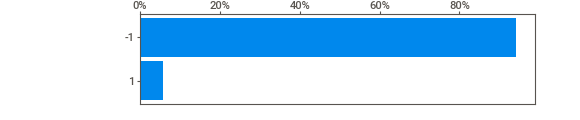
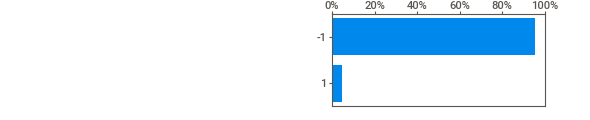
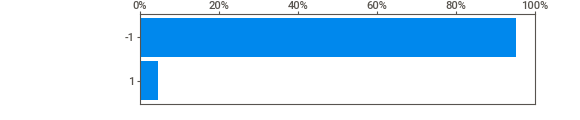
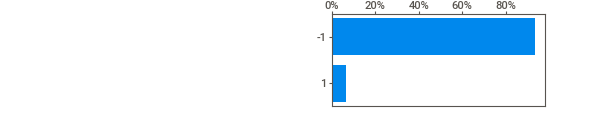
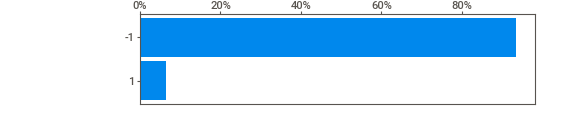
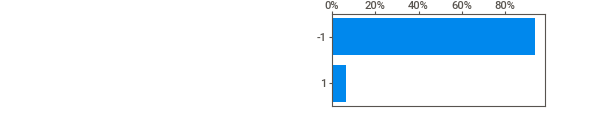
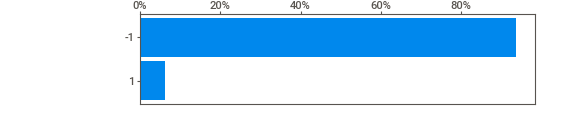
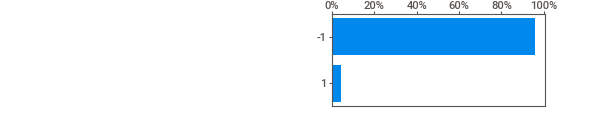
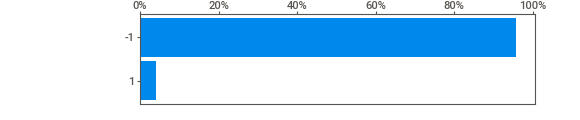
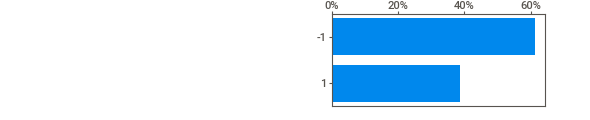
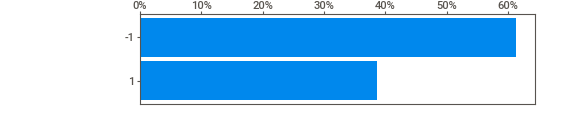
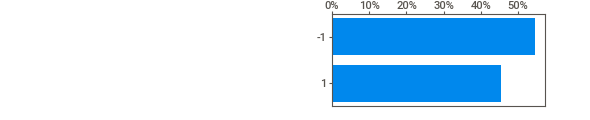
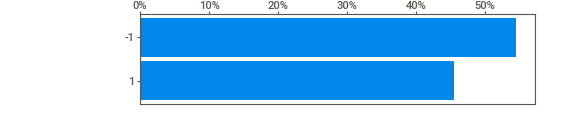
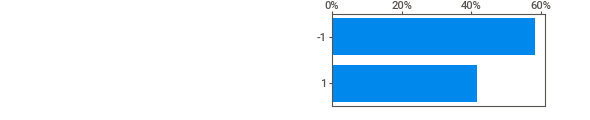
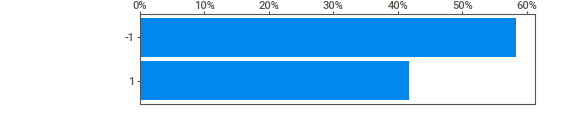
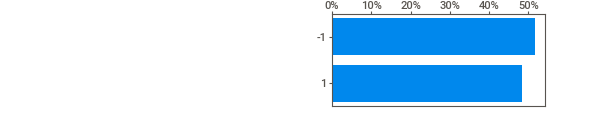
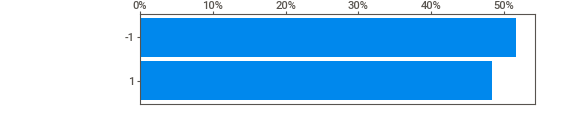
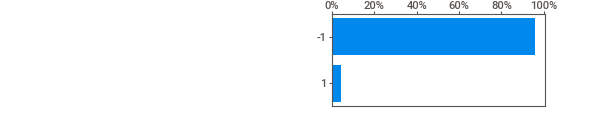
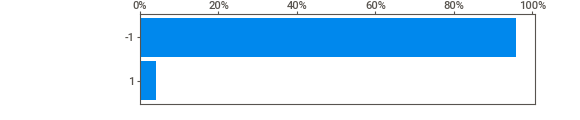
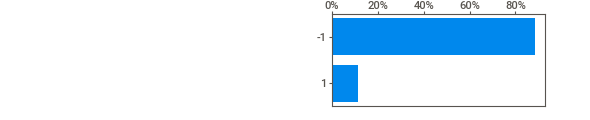
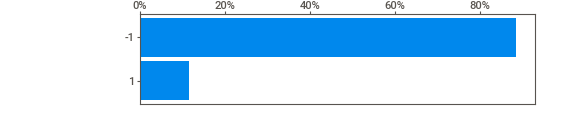
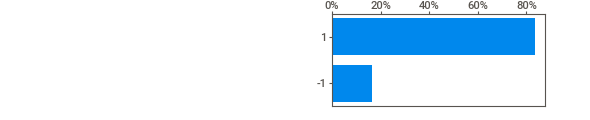
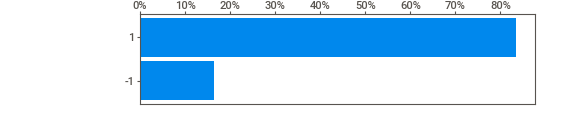
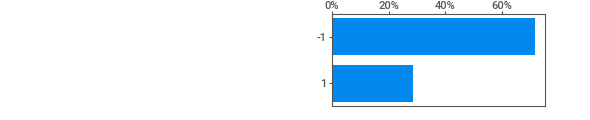
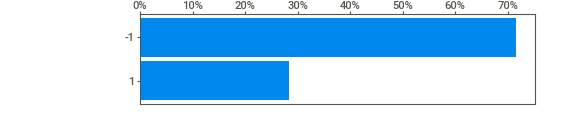
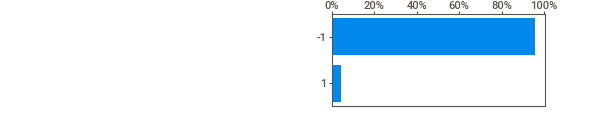
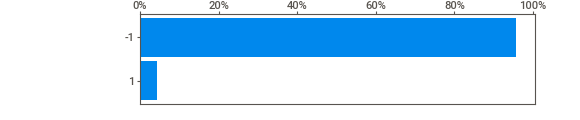
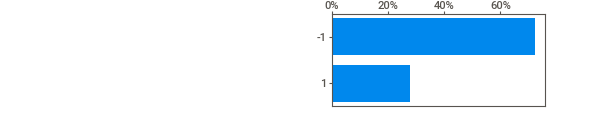
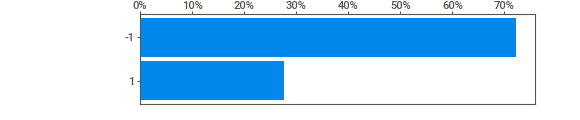
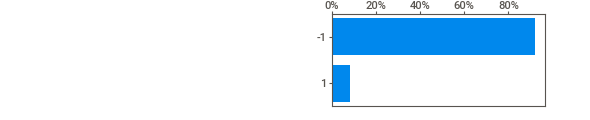
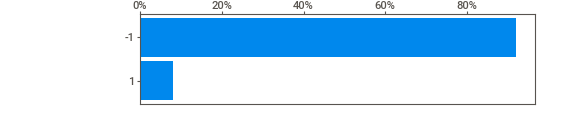
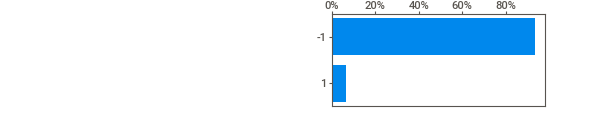
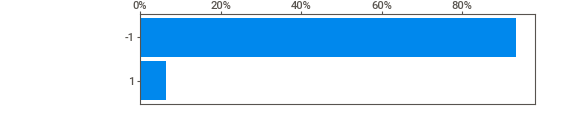
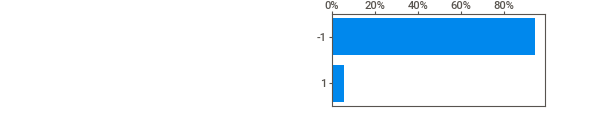
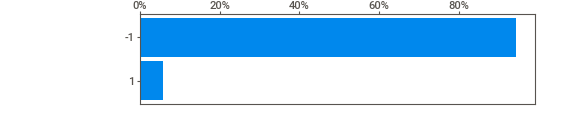
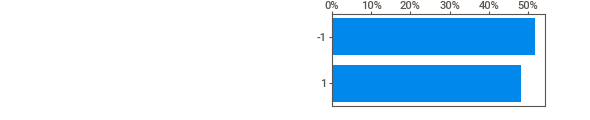
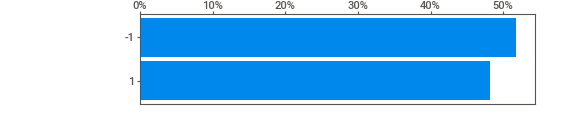
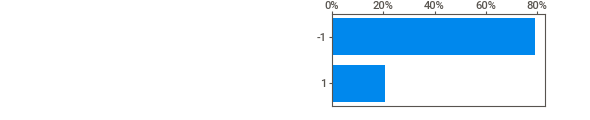
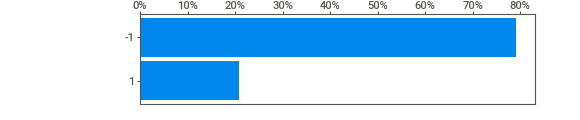
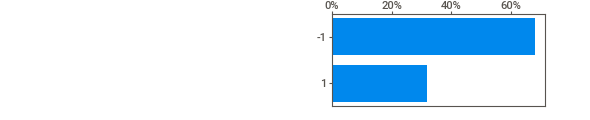
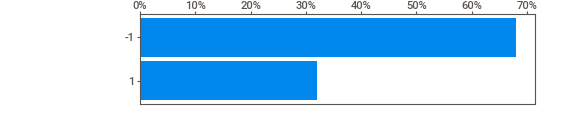
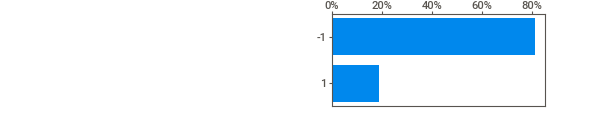
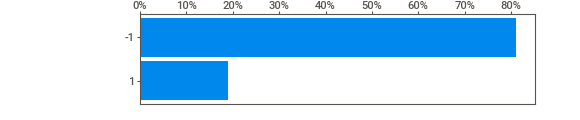
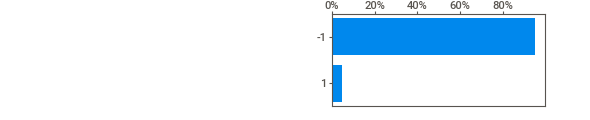
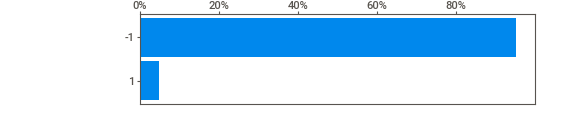
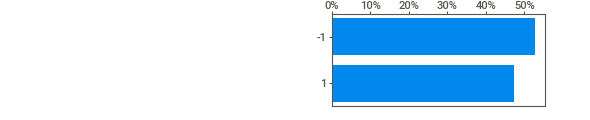
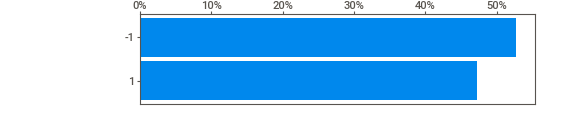
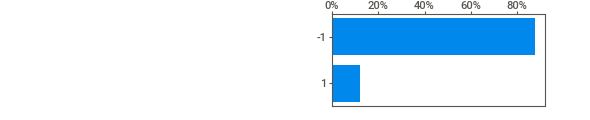
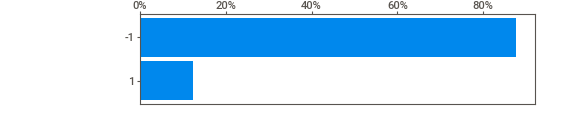
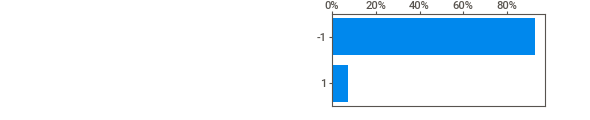
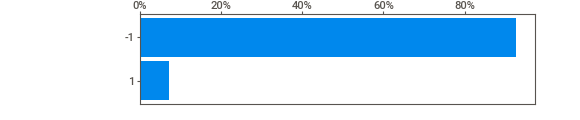
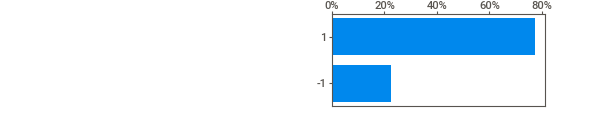
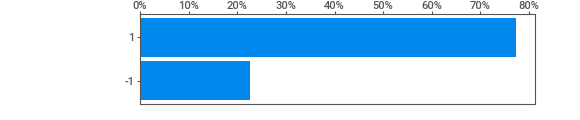
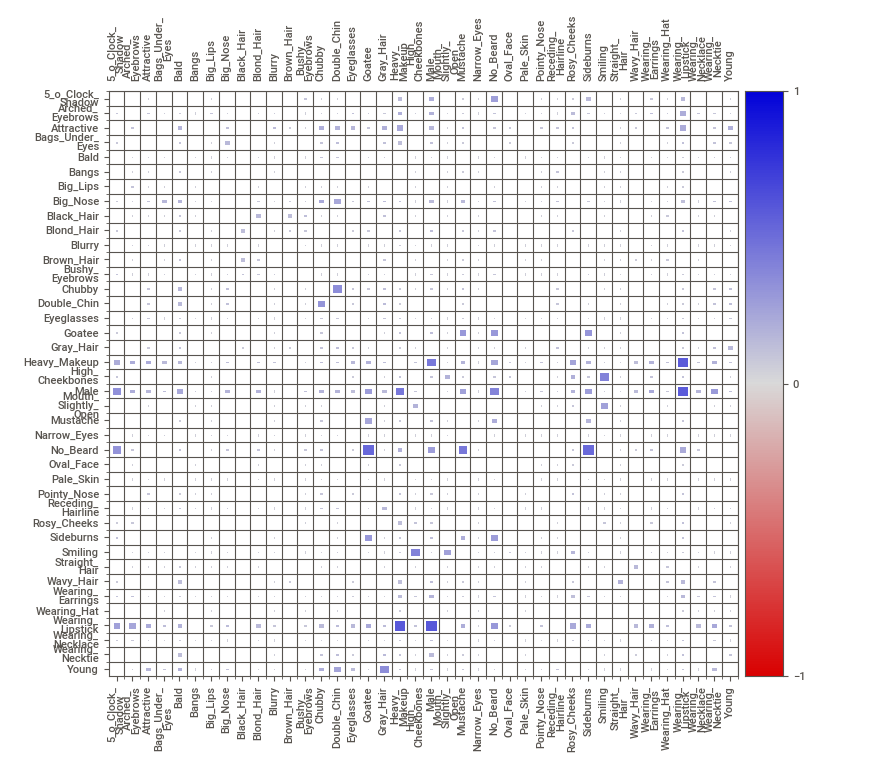
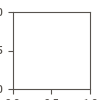

In [32]:
analysis.show_notebook(w=None, h=None, scale=None, layout='widescreen', filepath=None)